# Edit Graph

Plot edit graphs for a given dossier.

In [1]:
import json
import matplotlib.pyplot as plt
import networkx as nx

from itertools import combinations

LEG = 7
BASE = '/Users/kristof/GitHub/parl'


def display_edit_graph(ref,
                       title='', figdim=8,             # Figure configuration.
                       node_size=4, edge_size=2, k=1,  # Graph configuration.
                       path=None):
    """Display the edit graph for a given dossier reference.
    
    The `k` argument configures the spacing between nodes in the graph (see 
    networkx documentation for spring layout). Save the figure to `path` if 
    given. 
    """
    
    print('Dossier:', ref)
    # Get conflicts for dossier.
    conflicts = [data for data in dataset if data[0]['dossier_ref'] == ref]
    # Create nodes.
    nodes = set([edit['edit_id'] for conflict in conflicts for edit in conflict])
    # Map nodes to label.
    node2label = dict()
    for conflict in conflicts:
        for edit in conflict:
            if edit['edit_id'] not in node2label:
                node2label[edit['edit_id']] = edit['accepted']
    # Create edges.
    edges = list()
    for conflict in conflicts:
        for e1, e2 in combinations([edit for edit in conflict], r=2):
            e1, e2 = e1['edit_id'], e2['edit_id']
            if e1 != e2:
                edges.append((e1, e2))
    # Build graph.
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    # Add node colors.
    acc = 0
    acc_nodes = list()
    rej_nodes = list()
    for node in G:
        if node2label[node]:
            acc_nodes.append(node)
            acc += 1
        else:
            rej_nodes.append(node)
    # Print graph statistics.
    n = len(nodes)
    print(f'Number of nodes:  {n} ({acc/n*100:.2f}%) accepted')
    print('Number of cliques:',
          len([c for c in nx.find_cliques(G) if len(c) > 1]))
    # Plot.
    plt.figure(figsize=(figdim+0.5, figdim))
    pos = nx.spring_layout(G, k=k)
    # Draw accepted nodes.
    nx.draw_networkx_nodes(G, pos,
                           node_size=node_size, node_color='C2',
                           nodelist=acc_nodes)
    # Draw rejected nodes.
    nx.draw_networkx_nodes(G, pos,
                           node_size=node_size, node_color='C3', node_shape='X',
                           nodelist=rej_nodes)
    # Draw edges.
    nx.draw_networkx_edges(G, pos, width=edge_size)
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    if path is not None:
        print('Figure saved in', path)
        plt.savefig(path, bbox_inches='tight')
    plt.show()

## Load dataset

In [2]:
with open(f'{BASE}/papr/public-repo/data/raw/war-of-words-ep{LEG}.txt') as f:
    dataset = [json.loads(l) for l in f.readlines()]

## Display edit graph

Dossier: ENVI-AD(2012)487738
Number of nodes:  181 (54.70%) accepted
Number of cliques: 43


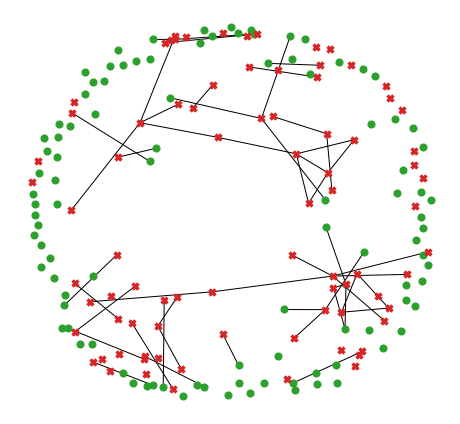

In [4]:
ref = 'ENVI-AD(2012)487738'
display_edit_graph(ref,
                   title='',
                   node_size=50,
                   edge_size=1,
                   k=0.4,
                   figdim=6,
                   path=None)